In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from reframed import load_cbmodel

In [55]:
df = pd.read_csv('../results/results_local.tsv', sep='\t', na_values='None')
df = df.dropna().query('test == "MILP"')

In [56]:
models = {x: load_cbmodel(f'../models/{x}.xml.gz', flavor='bigg') for x in set(df['model'])}
milp_sizes = {x: len(models[x].get_exchange_reactions()) for x in models}
df['size_milp'] = df['model'].apply(lambda x: milp_sizes[x])

In [57]:
solver_name = {
    'CPLEX_PY': 'cplex',
    'GUROBI': 'gurobi',
    'SCIP_CMD': 'scip',
    'HiGHS_CMD': 'highs',
    'GLPK_CMD': 'glpk',
    'COIN_CMD': 'coin',

}
df['solver'] = df['interface'].apply(lambda x: solver_name[x])

In [58]:
df2 = pd.read_csv('../results/sensitivity_milp.tsv', sep='\t', na_values='None')
df2 = df2.dropna().query('value > 1')
df2['solver'] = df2['interface'].apply(lambda x: solver_name[x])

In [59]:
order = list(solver_name.keys())
labels = list(reversed(solver_name.values()))

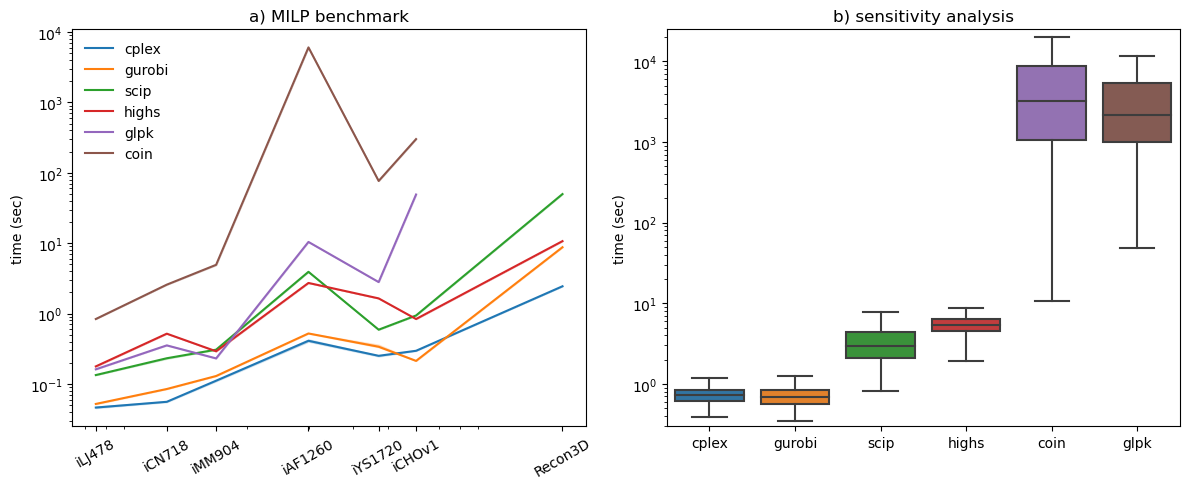

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=df, x="size_milp", y="time", hue="solver", ax=ax1, estimator="median", errorbar=("pi", 50))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks(list(milp_sizes.values()))
ax1.set_xticklabels(list(milp_sizes.keys()), rotation=30)
ax1.set_xlabel('')
ax1.set_ylabel('time (sec)')
ax1.legend(loc=2, frameon=False)
ax1.set_title('a) MILP benchmark')

#sns.kdeplot(df2, x="time", hue="interface", log_scale=True, fill=True, hue_order=order, ax=ax2)
#ax2.set_xlim(0.1, 1e6)
#ax2.set_xlabel('time (sec)')
#ax2.legend(labels, frameon=False)

sns.boxplot(df2, y='time', x='solver', ax=ax2, fliersize=0)
ax2.set_yscale('log')
ax2.set_xlabel('')
ax2.set_ylabel('time (sec)')
ax2.set_ylim(0.3,2.5e4)
ax2.set_title('b) sensitivity analysis')


f.tight_layout()
#f.savefig('../figures/results_milp.png', dpi=300)